<a href="https://colab.research.google.com/github/Micaiah01-svg/Personal-Projects/blob/main/Cell_Type_Specific_Immune_Responses_in_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scanpy anndata pandas numpy matplotlib seaborn gseapy harmonypy scanorama


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.3/605.3 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 100.3 MB/s eta 0:00:00
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551808 sha256=83fd2a36911cad5a804aa6dd7f98fb5c346c4fe3516532c5a3c0b9f9a33b88e9
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=ec28f1e6de9

In [2]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
adata = sc.datasets.pbmc68k_reduced()
adata

AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [4]:
np.random.seed(42)

adata.obs['condition'] = np.random.choice(
    ['Healthy', 'Disease'],
    size=adata.n_obs,
    p=[0.5, 0.5]
)

/tmp/ipython-input-19640420.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['bulk_labels', 'condition'], as_index=False) # Make bulk_labels and condition regular columns
/tmp/ipython-input-19640420.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .pipe(lambda df: df.assign(proportion=df.groupby('bulk_labels')['count'].transform(lambda x: x / x.sum()))) # Calculate proportions


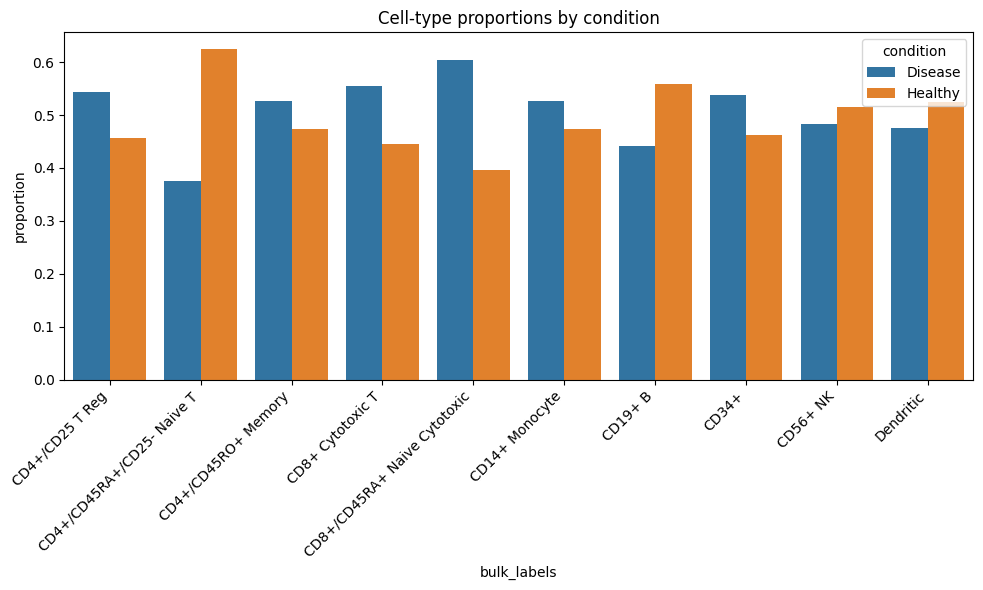

In [10]:
import os

cell_props = (
    adata.obs
    .groupby(['bulk_labels', 'condition'], as_index=False) # Make bulk_labels and condition regular columns
    .size() # This returns a DataFrame with 'bulk_labels', 'condition', and 'size' columns
    .rename(columns={'size': 'count'}) # Rename the 'size' column to 'count'
    .pipe(lambda df: df.assign(proportion=df.groupby('bulk_labels')['count'].transform(lambda x: x / x.sum()))) # Calculate proportions
    .drop(columns='count') # Drop the intermediate 'count' column
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=cell_props,
    x='bulk_labels',
    y='proportion',
    hue='condition'
)

plt.xticks(rotation=45, ha='right')
plt.title("Cell-type proportions by condition")
plt.tight_layout()

# Create the 'figures' directory if it doesn't exist
os.makedirs('figures', exist_ok=True)
plt.savefig("figures/cell_type_proportions.png")
plt.show()

In [11]:
adata.obs['batch'] = np.random.choice(
    ['Batch1', 'Batch2', 'Batch3'],
    size=adata.n_obs
)

In [13]:
import harmonypy as hm
sc.tl.pca(adata, svd_solver='arpack')
ho = hm.run_harmony(
    adata.obsm['X_pca'],
    adata.obs,
    'batch'
)
adata.obsm['X_pca_harmony'] = ho.Z_corr

2026-01-20 21:43:40,134 - harmonypy - INFO - Running Harmony (PyTorch on cpu)
INFO:harmonypy:Running Harmony (PyTorch on cpu)
2026-01-20 21:43:40,140 - harmonypy - INFO -   Parameters:
INFO:harmonypy:  Parameters:
2026-01-20 21:43:40,143 - harmonypy - INFO -     max_iter_harmony: 10
INFO:harmonypy:    max_iter_harmony: 10
2026-01-20 21:43:40,148 - harmonypy - INFO -     max_iter_kmeans: 20
INFO:harmonypy:    max_iter_kmeans: 20
2026-01-20 21:43:40,155 - harmonypy - INFO -     epsilon_cluster: 1e-05
INFO:harmonypy:    epsilon_cluster: 1e-05
2026-01-20 21:43:40,157 - harmonypy - INFO -     epsilon_harmony: 0.0001
INFO:harmonypy:    epsilon_harmony: 0.0001
2026-01-20 21:43:40,168 - harmonypy - INFO -     nclust: 23
INFO:harmonypy:    nclust: 23
2026-01-20 21:43:40,172 - harmonypy - INFO -     block_size: 0.05
INFO:harmonypy:    block_size: 0.05
2026-01-20 21:43:40,176 - harmonypy - INFO -     lamb: [1. 1. 1.]
INFO:harmonypy:    lamb: [1. 1. 1.]
2026-01-20 21:43:40,183 - harmonypy - INFO -

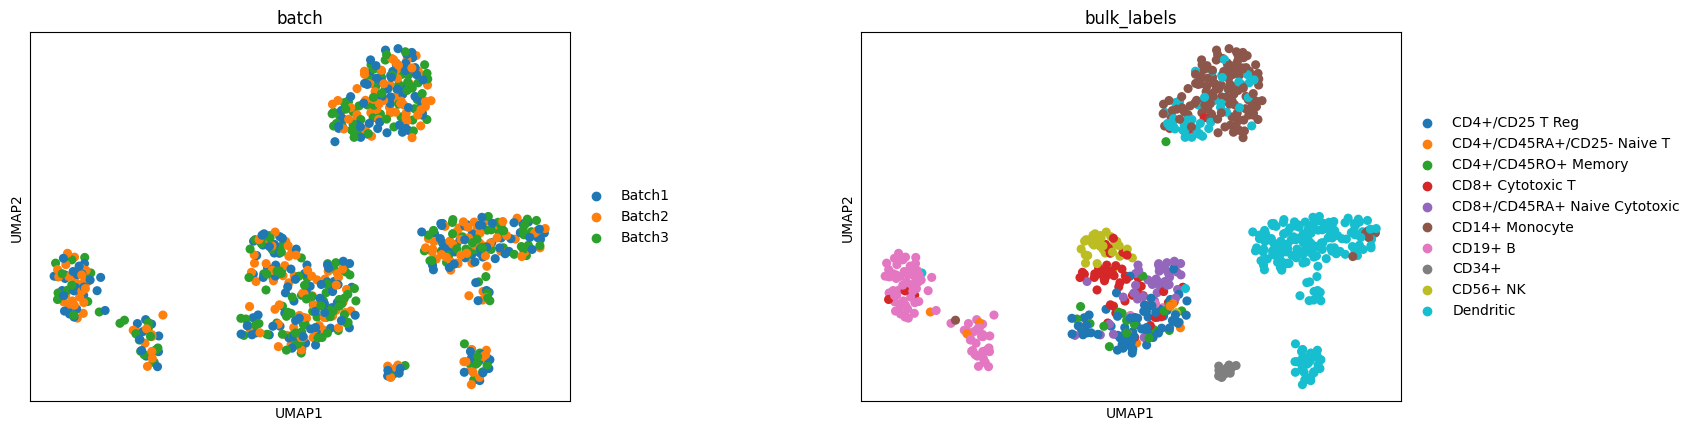

In [15]:
sc.pp.neighbors(adata, use_rep='X_pca_harmony')
sc.tl.umap(adata)

sc.pl.umap(
    adata,
    color=['batch', 'bulk_labels'],
    wspace=0.4,
    save="_integrated.png"
)

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_simple.py:391: RuntimeWarning: invalid value encountered in log1p
  np.log1p(x, out=x)


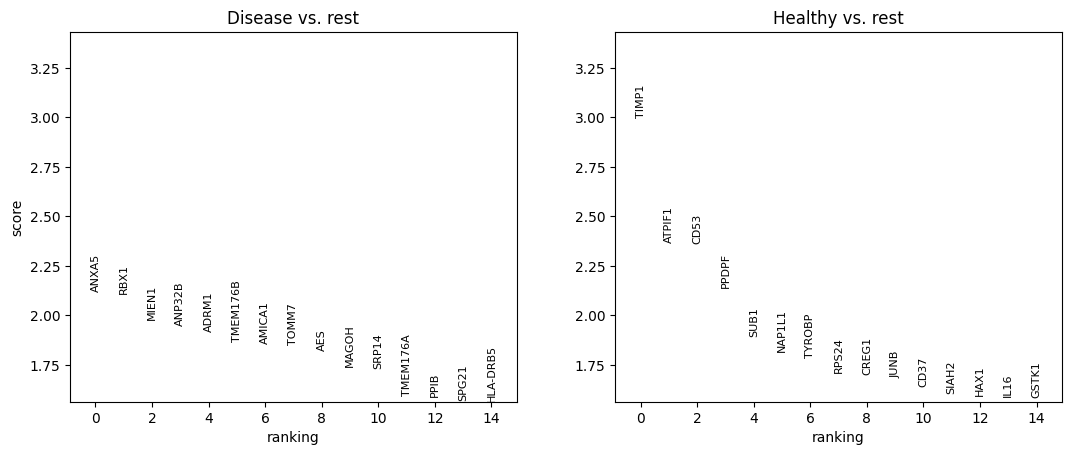

In [20]:
mono = adata[adata.obs['bulk_labels'] == 'CD14+ Monocyte'].copy()

# Logarithmize the data for this subset before running rank_genes_groups
# This addresses the warning about using raw count data.
sc.pp.log1p(mono)

sc.tl.rank_genes_groups(
    mono,
    groupby='condition',
    method='wilcoxon'
)
sc.pl.rank_genes_groups(
    mono,
    n_genes=15,
    save="_monocyte_DE.png"
)

In [22]:
de_results = sc.get.rank_genes_groups_df(
    mono,
    group='Disease' # Reverting to 'Disease' as the group key
)

# Create the 'results' directory if it doesn't exist
import os
os.makedirs('results', exist_ok=True)

de_results.to_csv(
    "results/monocyte_disease_vs_healthy_DE.csv",
    index=False
)

In [23]:
import gseapy as gp

top_genes = (
    de_results
    .query("logfoldchanges > 0")
    .head(200)['names']
    .tolist()
)

enr = gp.enrichr(
    gene_list=top_genes,
    gene_sets=['GO_Biological_Process_2021', 'KEGG_2021_Human'],
    organism='human',
    outdir='results/enrichment',
    cutoff=0.05
)

In [24]:
enr.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Asthma,9/31,1.391116e-11,2.615298e-09,0,0,42.361257,1058.960656,CD40;HLA-DRB5;HLA-DMB;FCER1G;HLA-DPB1;HLA-DRA;...
1,KEGG_2021_Human,Type I diabetes mellitus,9/43,3.508882e-10,2.441391e-08,0,0,27.393594,596.373701,HLA-DRB5;HLA-DMB;IL1B;HLA-DPB1;HLA-DRA;HLA-DRB...
2,KEGG_2021_Human,Viral myocarditis,10/60,3.895837e-10,2.441391e-08,0,0,20.789474,450.423539,CD40;HLA-DRB5;HLA-DMB;ITGB2;HLA-DPB1;HLA-DRA;B...
3,KEGG_2021_Human,Intestinal immune network for IgA production,9/48,9.995322e-10,4.697802e-08,0,0,23.875554,494.790618,CD40;HLA-DRB5;HLA-DMB;HLA-DPB1;CXCR4;HLA-DRA;H...
4,KEGG_2021_Human,Allograft rejection,8/38,3.286208e-09,1.235614e-07,0,0,27.458333,536.358216,CD40;HLA-DRB5;HLA-DMB;HLA-DPB1;HLA-DRA;HLA-DRB...
5,KEGG_2021_Human,Leishmaniasis,10/77,4.892479e-09,1.532977e-07,0,0,15.501178,296.623832,HLA-DRB5;MARCKSL1;HLA-DMB;IL1B;ITGB2;HLA-DPB1;...
6,KEGG_2021_Human,Graft-versus-host disease,8/42,7.664648e-09,2.058505e-07,0,0,24.223039,452.647390,HLA-DRB5;HLA-DMB;IL1B;HLA-DPB1;HLA-DRA;HLA-DRB...
7,KEGG_2021_Human,Tuberculosis,13/180,3.368100e-08,7.915036e-07,0,0,8.172820,140.624255,CD74;HLA-DRB5;FCER1G;ITGB2;HSPD1;HLA-DMB;IL1B;...
8,KEGG_2021_Human,Autoimmune thyroid disease,8/53,5.239063e-08,1.094382e-06,0,0,18.291667,306.651343,CD40;HLA-DRB5;HLA-DMB;HLA-DPB1;HLA-DRA;HLA-DRB...
9,KEGG_2021_Human,Antigen processing and presentation,9/78,8.394011e-08,1.578074e-06,0,0,13.474391,219.540440,CD74;HLA-DRB5;HLA-DMB;HLA-DPB1;HLA-DRA;HLA-DRB...
